Dataset Used : https://www.kaggle.com/datasets/patrickb1912/ipl-complete-dataset-20082020?select=matches.csv

### **Loading the Data**

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('matches.csv')
data.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,18-04-2008,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,19-04-2008,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,19-04-2008,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,20-04-2008,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,20-04-2008,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


### **Data Pre Processing**

In [40]:
for col in data.columns:
    if col not in ["id", "season", "city", "date", "player_of_match", "venue", "result_margin", "target_runs", "target_overs", "umpire1", "umpire2"]:
        print("Unique Values in :",col)
        print(len(data[col].unique()),":" ,data[col].unique())

Unique Values in : match_type
5 : ['League' 'Qualifier 1' 'Qualifier 2' 'Final' 'Eliminator']
Unique Values in : team1
12 : ['Royal Challengers Bengaluru' 'Punjab Kings' 'Delhi Capitals'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Sunrisers Hyderabad' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Gujarat Titans' 'Lucknow Super Giants']
Unique Values in : team2
12 : ['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Royal Challengers Bengaluru' 'Sunrisers Hyderabad' 'Punjab Kings'
 'Delhi Capitals' 'Mumbai Indians' 'Kochi Tuskers Kerala' 'Pune Warriors'
 'Gujarat Titans' 'Lucknow Super Giants']
Unique Values in : toss_winner
12 : ['Royal Challengers Bengaluru' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Sunrisers Hyderabad' 'Punjab Kings'
 'Kolkata Knight Riders' 'Delhi Capitals' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Gujarat Titans' 'Lucknow Super Giants']
Unique Values in : toss_decision
2 : ['field' 'bat']
Unique 

In [51]:
data = data.drop(["id", "date", "player_of_match", "result_margin","target_runs", "target_overs", "method", "result","umpire1", "umpire2"], axis=1)
data.head()

,season,city,match_type,venue,team1,team2,toss_winner,toss_decision,winner,super_over
0,2007/08,Bangalore,League,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,N
1,2007/08,Chandigarh,League,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,N
2,2007/08,Delhi,League,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,N
3,2007/08,Mumbai,League,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,N
4,2007/08,Kolkata,League,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,N


In [52]:
len(data)

1095

In [2]:
import pandas as pd

data = pd.read_csv('dataset.csv')

In [3]:
data.head()

,Unnamed: 0,season,city,match_type,venue,team1,team2,toss_winner,toss_decision,winner,super_over
0,0,2007/08,Bangalore,League,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,N
1,1,2007/08,Chandigarh,League,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,N
2,2,2007/08,Delhi,League,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,N
3,3,2007/08,Mumbai,League,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,N
4,4,2007/08,Kolkata,League,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,N


In [4]:
from sklearn.preprocessing import LabelEncoder

le_team = LabelEncoder()
le_city = LabelEncoder()
le_venue = LabelEncoder()
le_match_type = LabelEncoder()

In [5]:
data['toss_decision'] = (data['toss_decision'] == 'field').astype(int)
data['super_over'] = (data['super_over'] == 'Y').astype(int)

In [6]:
all_teams = pd.concat([data['team1'], data['team2'], data['toss_winner'], data['winner']])
le_team.fit(all_teams)

LabelEncoder()

In [7]:
data['team1'] = le_team.transform(data['team1'])
data['team2'] = le_team.transform(data['team2'])
data['toss_winner'] = le_team.transform(data['toss_winner'])
data['winner'] = le_team.transform(data['winner'])

In [8]:
data['city'] = le_city.fit_transform(data['city'])
data['venue'] = le_venue.fit_transform(data['venue'])
data['match_type'] = le_match_type.fit_transform(data['match_type'])

In [9]:
data['toss_winner'] = (data['toss_winner'] == data['team2']).astype(int)
data['winner'] = (data['winner'] == data['team2']).astype(int)

In [10]:
import tensorflow as tf


X = data[['team1', 'team2', 'city', 'venue', 'match_type']]
y_tw = tf.keras.utils.to_categorical(data['toss_winner'])
y_td = data['toss_decision'].values.reshape(-1, 1)
y_w = tf.keras.utils.to_categorical(data['winner'])
y_so = data['super_over'].values.reshape(-1, 1)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_tw_train, y_tw_test, y_td_train, y_td_test, y_w_train, y_w_test, y_so_train, y_so_test = train_test_split(
    X, y_tw, y_td, y_w, y_so,
    test_size=0.1,
    shuffle=False
)



In [12]:
inputs = tf.keras.Input(shape=(5,))
layer1 = tf.keras.layers.Dense(128, activation='relu')(inputs)
dropout1 = tf.keras.layers.Dropout(0.2)(layer1)
batchnorm1 = tf.keras.layers.BatchNormalization()(dropout1)
layer2 = tf.keras.layers.Dense(64, activation='relu')(batchnorm1)

In [13]:
toss_winner = tf.keras.layers.Dense(2, activation='softmax', name='toss_winner')(layer2)
toss_decision = tf.keras.layers.Dense(1, activation='sigmoid', name='toss_decision')(layer2)
match_winner = tf.keras.layers.Dense(2, activation='softmax', name='match_winner')(layer2)
super_over_prob = tf.keras.layers.Dense(1, activation='sigmoid', name='super_over_prob')(layer2)

In [14]:
model = tf.keras.Model(inputs=inputs, outputs=[toss_winner, toss_decision, match_winner, super_over_prob])

In [15]:
model.compile(
    optimizer='adam',
    loss = {
        'toss_winner': 'categorical_crossentropy',
        'toss_decision': 'binary_crossentropy',
        'match_winner': 'categorical_crossentropy',
        'super_over_prob': 'binary_crossentropy'
    },
    loss_weights={'toss_winner': 0.25, 'toss_decision': 0.25, 'match_winner': 0.35, 'super_over_prob': 0.15},
    metrics={
        'toss_winner': 'accuracy',
        'toss_decision': ['accuracy', tf.keras.metrics.AUC()],
        'match_winner': 'accuracy',
        'super_over_prob': ['accuracy', tf.keras.metrics.AUC()]
    }
)

In [16]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │        768 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 128)       │        512 │ dropout[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ toss_winner (Dense) │ (None, 2)         │        130 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ toss_decision       │ (None, 1)         │         65 │ dense_1[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ match_winner        │ (None, 2)         │        130 │ dense_1[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ super_over_prob     │ (None, 1)         │         65 │ dense_1[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 9,926 (38.77 KB)

 Trainable params: 9,670 (37.77 KB)

 Non-trainable params: 256 (1.00 KB)

In [17]:
from keras.utils import plot_model


plot_model(model)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [18]:
history = model.fit(
    X_train, 
    [y_tw_train, y_td_train, y_w_train, y_so_train],
    validation_split=0.1,
    epochs=20,
    batch_size=32
)


Epoch 1/20


C:\Users\rahul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


15/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7286 - match_winner_accuracy: 0.4662 - match_winner_loss: 0.2026 - super_over_prob_accuracy: 0.8956 - super_over_prob_auc_1: 0.5225 - super_over_prob_loss: 0.0000e+00 - toss_decision_accuracy: 0.4078 - toss_decision_auc: 0.4493 - toss_decision_loss: 0.1425 - toss_winner_accuracy: 0.4790 - toss_winner_loss: 0.3784  

C:\Users\rahul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.6973 - match_winner_accuracy: 0.4696 - match_winner_loss: 0.2006 - super_over_prob_accuracy: 0.9184 - super_over_prob_auc_1: 0.5126 - super_over_prob_loss: 0.0000e+00 - toss_decision_accuracy: 0.4346 - toss_decision_auc: 0.4652 - toss_decision_loss: 0.1368 - toss_winner_accuracy: 0.4829 - toss_winner_loss: 0.3598 - val_loss: 0.6710 - val_match_winner_accuracy: 0.4242 - val_match_winner_loss: 0.2054 - val_super_over_prob_accuracy: 1.0000 - val_super_over_prob_auc_1: 0.0000e+00 - val_super_over_prob_loss: 0.0000e+00 - val_toss_decision_accuracy: 0.4040 - val_toss_decision_auc: 0.5401 - val_toss_decision_loss: 0.1839 - val_toss_winner_accuracy: 0.8081 - val_toss_winner_loss: 0.3197
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5884 - match_winner_accuracy: 0.5392 - match_winner_loss: 0.1924 - super_over_prob_accuracy: 0.9889 - super_over_prob_auc_1: 0.4972 - super_over_prob_loss: 0.0000e+00 - toss_decision_accuracy: 0.5419 - 

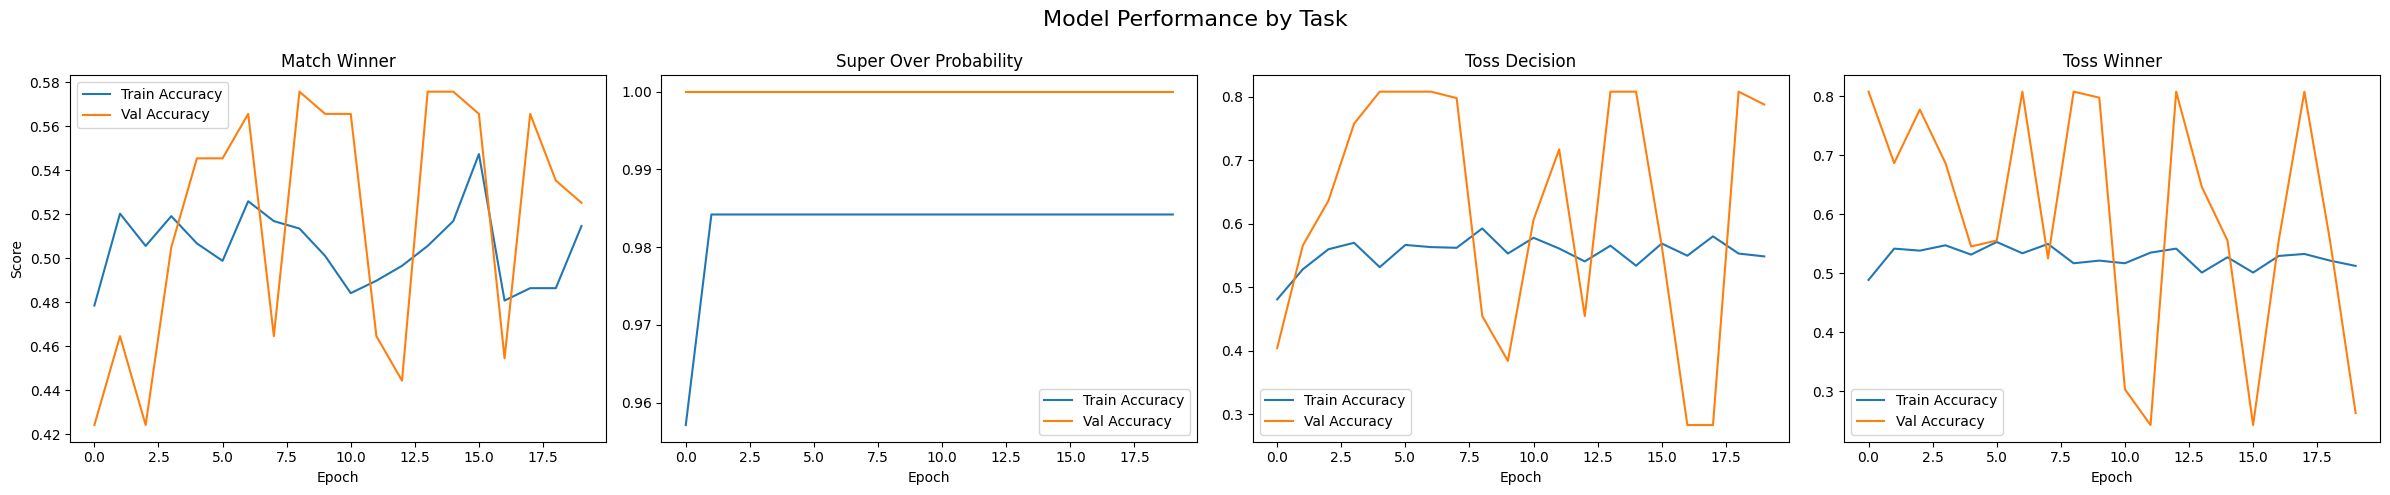

In [23]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 4, figsize=(24, 5))
fig.suptitle('Model Performance by Task', fontsize=16)

# 1. Match Winner
axs[0].plot(history.history['match_winner_accuracy'], label='Train Accuracy')
axs[0].plot(history.history['val_match_winner_accuracy'], label='Val Accuracy')
axs[0].set_title('Match Winner')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Score')
axs[0].legend()

# 2. Super Over Probability
axs[1].plot(history.history['super_over_prob_accuracy'], label='Train Accuracy')
axs[1].plot(history.history['val_super_over_prob_accuracy'], label='Val Accuracy')
axs[1].set_title('Super Over Probability')
axs[1].set_xlabel('Epoch')
axs[1].legend()

# 3. Toss Decision
axs[2].plot(history.history['toss_decision_accuracy'], label='Train Accuracy')
axs[2].plot(history.history['val_toss_decision_accuracy'], label='Val Accuracy')
axs[2].set_title('Toss Decision')
axs[2].set_xlabel('Epoch')
axs[2].legend()

# 4. Toss Winner
axs[3].plot(history.history['toss_winner_accuracy'], label='Train Accuracy')
axs[3].plot(history.history['val_toss_winner_accuracy'], label='Val Accuracy')
axs[3].set_title('Toss Winner')
axs[3].set_xlabel('Epoch')
axs[3].legend()

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


### **Saving the Model**

In [24]:
import pickle
from joblib import dump

# Save the trained model
model.save('cricket_model.keras')

# Save the LabelEncoders
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump({
        'team': le_team,
        'city': le_city,
        'venue': le_venue,
        'match_type': le_match_type
    }, f)


### **Loading the Model**

In [25]:
from tensorflow.keras.models import load_model

# Load model
model = load_model('cricket_model.keras')

# Load encoders
with open('label_encoders.pkl', 'rb') as f:
    encoders = pickle.load(f)

le_team = encoders['team']
le_city = encoders['city']
le_venue = encoders['venue']
le_match_type = encoders['match_type']


### **Making sample prediction**

In [ ]:
import numpy as np

sample_data = {
    'team1': 'Chennai Super Kings',
    'team2': 'Royal Challengers Bengaluru',
    'city': 'Chennai',
    'venue': 'MA Chidambaram Stadium, Chepauk',
    'match_type': 'League'
}

sample_input = np.array([[
    le_team.transform([sample_data['team1']])[0],
    le_team.transform([sample_data['team2']])[0],
    le_city.transform([sample_data['city']])[0],
    le_venue.transform([sample_data['venue']])[0],
    le_match_type.transform([sample_data['match_type']])[0],
]])

predictions = model.predict(sample_input)

toss_winner = 'team2' if np.argmax(predictions[0]) == 1 else 'team1'
toss_decision = 'field' if predictions[1][0][0] > 0.5 else 'bat'
match_winner = 'team2' if np.argmax(predictions[2]) == 1 else 'team1'
super_over = 'Yes' if predictions[3][0][0] > 0.5 else 'No'

print("Predicted Toss Winner:", sample_data[toss_winner])
print("Toss Decision:", toss_decision)
print("Predicted Match Winner:", sample_data[match_winner])
print("Possible Super Over?", super_over)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted Toss Winner: Royal Challengers Bengaluru
Toss Decision: bat
Predicted Match Winner: Royal Challengers Bengaluru
Possible Super Over? No
